In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D, Resizing
from keras.applications.mobilenet import MobileNet

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import optimizers
from keras.layers import Resizing
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("Size of the train images", x_train.shape)
print("Size of the test images", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Size of the train images (50000, 32, 32, 3)
Size of the test images (10000, 32, 32, 3)


In [3]:
x_test, y_test = x_test[:5000], y_test[:5000]
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[30000:], y_train[30000:]

In [4]:
print("Training data size: ", x_train.shape)
print("Validation data size: ", x_val.shape)
print("Test data size: ", x_test.shape)
print("Training data Labels", y_train.shape)
print("Validation data Labels", y_val.shape)

Training data size:  (20000, 32, 32, 3)
Validation data size:  (5000, 32, 32, 3)
Test data size:  (5000, 32, 32, 3)
Training data Labels (20000, 1)
Validation data Labels (5000, 1)


In [5]:
from sklearn.utils import shuffle

x_val, y_val  = shuffle(x_val, y_val)
x_train, y_train = shuffle(x_train, y_train)

In [6]:
mobnet_model=MobileNet(weights='imagenet',include_top=False)

<ipython-input-6-aa29418c595b>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobnet_model=MobileNet(weights='imagenet',include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
image_size = (224,224)

from keras import layers
from keras import models

num_classes = 10

model1 = Sequential()
model1.add(Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=x_train.shape[1:]))


model1.add(mobnet_model)
model1.add(GlobalAveragePooling2D())

model1.add(Dense(1024,activation=('relu')))
model1.add(Dense(512,activation=('relu')))
model1.add(Dense(256,activation=('relu')))
model1.add(Dropout(0.5))
model1.add(Dense(128,activation=('relu')))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation=('softmax')))

model1.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])
# Creating the model and compiling it
model1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# a summary of the model
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,968,778 (18.95 MB)

 Trainable params: 4,946,890 (18.87 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [8]:
history = model1.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_data = (x_test, y_test))

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 259ms/step - accuracy: 0.4985 - loss: 1.4853 - val_accuracy: 0.6238 - val_loss: 1.2694
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 176ms/step - accuracy: 0.8224 - loss: 0.6375 - val_accuracy: 0.6550 - val_loss: 1.1821
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 181ms/step - accuracy: 0.8649 - loss: 0.4833 - val_accuracy: 0.7352 - val_loss: 1.0031
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 175ms/step - accuracy: 0.8954 - loss: 0.3660 - val_accuracy: 0.8328 - val_loss: 0.6544
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.9148 - loss: 0.2955 - val_accuracy: 0.8214 - val_loss: 0.6504
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 181ms/step - accuracy: 0.9230 - loss: 0.2821 - val_accuracy: 0.8312 - val_loss: 0.6612
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 175ms/step - accuracy: 0.9412 - loss: 0.2134 - val_accuracy: 0.8660 - val_loss: 0.4787
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.9364 - loss: 

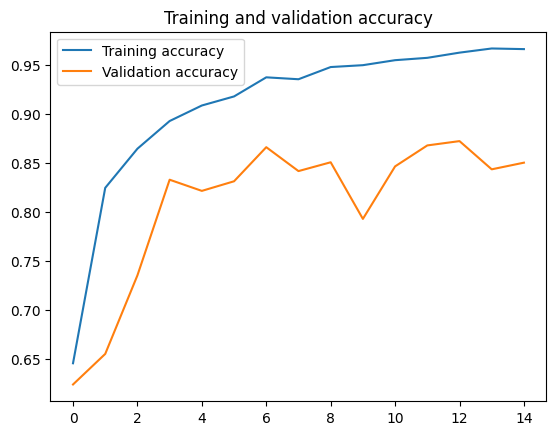

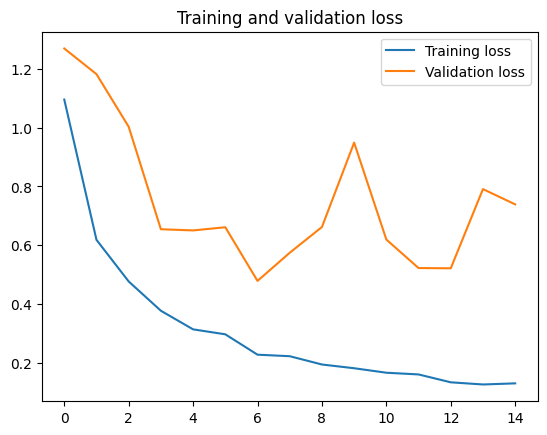

In [9]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [10]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("Accuracy for test data : ",accuracy)
print("Loss for test data : ",loss)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8521 - loss: 0.7268
Accuracy for test data :  0.8501999974250793
Loss for test data :  0.7390182018280029


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


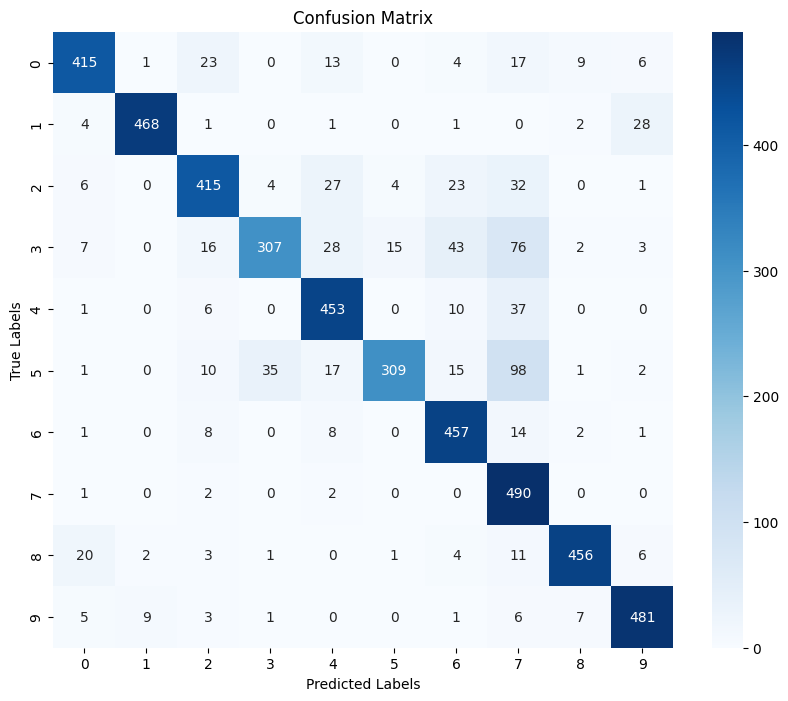

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()


conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


In [19]:
# Print classification report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       488
           1       0.97      0.93      0.95       505
           2       0.85      0.81      0.83       512
           3       0.88      0.62      0.73       497
           4       0.83      0.89      0.86       507
           5       0.94      0.63      0.76       488
           6       0.82      0.93      0.87       491
           7       0.63      0.99      0.77       495
           8       0.95      0.90      0.93       504
           9       0.91      0.94      0.92       513

    accuracy                           0.85      5000
   macro avg       0.87      0.85      0.85      5000
weighted avg       0.87      0.85      0.85      5000

